**<font size="6" color="red">ch12. 데이터프레임과 시리즈(Pandas)</font>**

# 1절. 판다스 패키지

- 1차원 구조를 갖는 시리즈, 2차원 구조를 갖는 데이터프레임 제공 ,<br>
- 결측치처리, 크기변경(열삽입,열삭제,원하는부분만슬라이싱), 데이터분할하거나 병합 구조변경,<br>
  데이터정렬, 파일입출력 등이 용이
  
  - https://pypi.python.org/pypi/pandas (package index)
  - http://pandas.pydata.org/pandas-docs/stable/api.html (API reference)

In [2]:
%ls data

 D 드라이브의 볼륨: 학생방
 볼륨 일련 번호: 6CF0-520F

 D:\kks\src\8_Python\data 디렉터리

2021-03-03  오후 04:06    <DIR>          .
2021-03-03  오후 04:06    <DIR>          ..
2021-03-02  오후 03:44    <DIR>          .ipynb_checkpoints
2021-03-02  오후 06:09               118 9_cus2.csv
2021-03-02  오후 06:16                77 9_cusc.csv
2021-03-02  오후 06:06               161 9_lastcus.csv
2021-03-02  오전 10:25               108 ch0_member3-2.csv
2021-02-26  오후 03:02                38 ch08_abc.txt
2021-03-02  오후 03:47               239 ch09_customer10.json
2021-03-02  오후 06:17                 0 ch09_customers.txt
2021-03-02  오후 02:32           292,544 ch09_iris.hdf5
2021-03-02  오후 02:45         1,069,192 ch09_iris2.hdf5
2021-02-26  오후 06:19               230 ch09_member.data
2021-02-26  오후 06:01               106 ch09_member.txt
2021-03-02  오전 10:09               161 ch09_member1.csv
2021-03-02  오후 03:47                 0 ch09_member10.json
2021-03-02  오전 11:05                91 ch09_member2.csv
2021-03-02  오후 12:

In [3]:
import pandas as pd
data = pd.read_json('data/ch09_member2.json', encoding='utf-8')
data

,name,age,email,address
0,홍길동,20,1hong@hong.com,서울
1,이길동,25,2hong@hong.com,대전
2,박길동,30,3hong@hong.com,대구


In [4]:
type(data)

pandas.core.frame.DataFrame

# 2절. 데이터 프레임 만들기

## 2.1 딕셔너리를 이용해서 데이터 프레임 만들기

In [5]:
import pandas as pd
d = {'col1':[1,2], 'col2':[3,4]}
df = pd.DataFrame(data = d)
df

,col1,col2
0,1,3
1,2,4


In [6]:
d = [{'col1':1,'col2':3},{'col1':2, 'col2':4}]
df = pd.DataFrame(data=d)
df

,col1,col2
0,1,3
1,2,4


In [7]:
d = [{'col1':1,'col2':3},{'col1':2, 'col2':4},{'col':9}]
df = pd.DataFrame(data=d)
df

,col1,col2,col
0,1.0,3.0,NaN
1,2.0,4.0,NaN
2,NaN,NaN,9.0


## 2.2 리스트를 이용해 데이터 프레임 만들기

In [8]:
kor = [100,95,94,92,90]
math = [90,95,82,73,60]
df = pd.DataFrame({'kor':kor, 'math':math})
df

,kor,math
0,100,90
1,95,95
2,94,82
3,92,73
4,90,60


In [9]:
import numpy as np
df = pd.DataFrame(np.c_[kor, math], columns=['kor','math'])
df

,kor,math
0,100,90
1,95,95
2,94,82
3,92,73
4,90,60


In [10]:
np.c_[kor,math]

array([[100,  90],
       [ 95,  95],
       [ 94,  82],
       [ 92,  73],
       [ 90,  60]])

In [11]:
np.c_[[kor],[math]]

array([[100,  95,  94,  92,  90,  90,  95,  82,  73,  60]])

In [12]:
pd.DataFrame(np.c_[[kor],[math]], 
            columns=['score1','score2','score3','score4','score5','score6',
                    'score7','score8','score9','score10'])

,score1,score2,score3,score4,score5,score6,score7,score8,score9,score10
0,100,95,94,92,90,90,95,82,73,60


## 2.3 read_csv()

In [13]:
df = pd.read_csv('C:/big/Download/용량이 큰 공유파일들/python_data/상가업소정보_201912_01.csv', sep='|', encoding='utf-8')

FileNotFoundError: [Errno 2] No such file or directory: 'C:/big/Download/용량이 큰 공유파일들/python_data/상가업소정보_201912_01.csv'

In [ ]:
df.head(3)

In [ ]:
pd.options.display.max_columns # 최대로 출력될 수 있는 컬럼수

In [ ]:
pd.options.display.max_columns = 39 # 최대 39열까지 출력 가능
df.head(1)

In [ ]:
# (1) CSV파일로 읽어 오기
member_df = pd.read_csv('data/ch12_member_data.csv', sep=',', encoding='utf-8')
member_df

In [ ]:
# 2) 주석행 지정
member_df = pd.read_csv('data/ch12_member_data.csv', sep=',', encoding='utf-8',
                       comment='#')
member_df

In [ ]:
type(member_df) # 2차원 : DataFrame

In [ ]:
type(member_df['Name']) # 1차원 : Series

In [ ]:
# 3) 행 제외해서 읽어오기
member_df = pd.read_csv('data/ch12_member_data.csv',  skiprows=[1,3], sep=',',
                       comment='#')
member_df

## 2.4 sklearn.datasets 모듈 데이터를 데이터 프레임으로 변환하기
- sklearn 패키지에는 학습을 위한 많은 데이터셋 제공. 딕셔너리 형태로 제공

In [58]:
from sklearn import datasets
import pandas as pd
import numpy as np

In [59]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [60]:
iris["feature_names"] # 독립변수의 columns
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [61]:
iris["data"] # 독립변수
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [62]:
iris['target'] # 원핫인코딩이 된 종속변수
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [63]:
iris['target_names']
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [64]:
# 사람이 알아보기 쉬운 원핫인코딩 안된 종속변수
iris.target_names[iris.target]
iris['target_names'][iris['target']]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [65]:
x = pd.DataFrame(iris.data, columns=iris.feature_names)
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [66]:
x.columns = [col[0:12].strip().replace(' ','_') for col in x.columns]
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [67]:
#x.columns = ['sepal_length', 'sepal_width','petal_length','petal_width']
x # 독립변수

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [68]:
y = pd.DataFrame(iris.target_names[iris.target], columns=['species'])
y # 종속변수

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [69]:
iris = pd.concat([x,y], axis=1) # 열병합
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [70]:
iris.head(-148)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [71]:
iris.shape

(150, 5)

In [72]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


# 3절. 이름지정하기(열,행)

## 3.1 열이름 지정하기

In [15]:
member_df = pd.read_csv('data/ch12_member_data.csv', comment='#')
member_df

,Name,Age,Email,Address
0,홍길동,20,kildong@hong.com,서울시 강동구
1,홍길서,25,kilseo@hong.com,서울시 강서구
2,홍길남,26,south@hong.com,서울시 강남구
3,홍길북,30,north@hong.com,서울시 강북구


In [16]:
member_df.columns = ['이름','나이','이메일','주소']
member_df

,이름,나이,이메일,주소
0,홍길동,20,kildong@hong.com,서울시 강동구
1,홍길서,25,kilseo@hong.com,서울시 강서구
2,홍길남,26,south@hong.com,서울시 강남구
3,홍길북,30,north@hong.com,서울시 강북구


## 3.2 행이름 지정하기

In [17]:
member_df.index = ['동','서','남','북']
member_df

,이름,나이,이메일,주소
동,홍길동,20,kildong@hong.com,서울시 강동구
서,홍길서,25,kilseo@hong.com,서울시 강서구
남,홍길남,26,south@hong.com,서울시 강남구
북,홍길북,30,north@hong.com,서울시 강북구


In [18]:
member_df.loc[['동','남'],'이름']

동    홍길동
남    홍길남
Name: 이름, dtype: object

## 3.3 레벨이름 지정하기

In [19]:
member_df.columns = [['기본정보','기본정보','추가정보','추가정보'],
                     ['이름',    '나이',    '이메일',  '주소']]
member_df.columns.names = ['대분류','소분류']
member_df

대분류 기본정보                  추가정보         
소분류   이름  나이               이메일       주소
동    홍길동  20  kildong@hong.com  서울시 강동구
서    홍길서  25   kilseo@hong.com  서울시 강서구
남    홍길남  26    south@hong.com  서울시 강남구
북    홍길북  30    north@hong.com  서울시 강북구

In [20]:
member_df.index = [['좌우','좌우','상하','상하'],
                   ['동',  '서',  '남',  '북']]
member_df

대분류  기본정보                  추가정보         
소분류    이름  나이               이메일       주소
좌우 동  홍길동  20  kildong@hong.com  서울시 강동구
   서  홍길서  25   kilseo@hong.com  서울시 강서구
상하 남  홍길남  26    south@hong.com  서울시 강남구
   북  홍길북  30    north@hong.com  서울시 강북구

In [21]:
# columns나 index가 레벨을 두면 부분 데이터 조회가 불편

member_df.loc['상하','기본정보']['이름']['남']

'홍길남'

# 4절. 부분 데이터 조회
- 단일열만 조회, loc, iloc

In [22]:
# member_df = pd.read_csv('data/ch12_member_data.csv', comment='#')
member_df.columns = ['이름','나이','이메일','주소']
member_df.index = range(member_df.shape[0]) # [0,1,2,3]
member_df 

,이름,나이,이메일,주소
0,홍길동,20,kildong@hong.com,서울시 강동구
1,홍길서,25,kilseo@hong.com,서울시 강서구
2,홍길남,26,south@hong.com,서울시 강남구
3,홍길북,30,north@hong.com,서울시 강북구


In [23]:
member_df.shape

(4, 4)

# 4.1 단일열 조회

In [32]:
member_df.이름

0    홍길동
1    홍길서
2    홍길남
3    홍길북
Name: 이름, dtype: object

In [33]:
member_df["이름"]

0    홍길동
1    홍길서
2    홍길남
3    홍길북
Name: 이름, dtype: object

In [34]:
# 데이터 프레임을 읽고...
member_df.shape

(4, 4)

In [35]:
member_df.head()

,이름,나이,이메일,주소
0,홍길동,20,kildong@hong.com,서울시 강동구
1,홍길서,25,kilseo@hong.com,서울시 강서구
2,홍길남,26,south@hong.com,서울시 강남구
3,홍길북,30,north@hong.com,서울시 강북구


In [36]:
member_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   이름      4 non-null      object
 1   나이      4 non-null      int64 
 2   이메일     4 non-null      object
 3   주소      4 non-null      object
dtypes: int64(1), object(3)
memory usage: 256.0+ bytes


In [37]:
pd.to_numeric(member_df["나이"], errors="coerce") # 문자인 '나이'필드를 숫자로 바꾸고 에러는 무시

0    20
1    25
2    26
3    30
Name: 나이, dtype: int64

In [38]:
member_df.isnull() #결측치 확인

,이름,나이,이메일,주소
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False


In [39]:
False == 0

True

In [40]:
True == 1

True

In [41]:
False + False + False + True

1

In [42]:
member_df.isnull().sum() # 열별 결측치 수

이름     0
나이     0
이메일    0
주소     0
dtype: int64

In [43]:
member_df.isna() # 결측치면 True, 결측치가 아니면 False

,이름,나이,이메일,주소
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False


In [44]:
member_df.isna().sum() # 열별 결측치 수

이름     0
나이     0
이메일    0
주소     0
dtype: int64

In [45]:
type(member_df["이름"]) # 데이터프레임에서 단일열을 시리즈

pandas.core.series.Series

In [46]:
member_df["이름"] # dtype 요소의 타입

0    홍길동
1    홍길서
2    홍길남
3    홍길북
Name: 이름, dtype: object

## 4.2 loc을 이용한 조회(columns, index로 조회)

In [47]:
member_df.index = ['동','서','남','북']
member_df

,이름,나이,이메일,주소
동,홍길동,20,kildong@hong.com,서울시 강동구
서,홍길서,25,kilseo@hong.com,서울시 강서구
남,홍길남,26,south@hong.com,서울시 강남구
북,홍길북,30,north@hong.com,서울시 강북구


In [48]:
member_df.loc[:,'이름':'이메일'] # 모든행의 이름, 나이, 이메일 

,이름,나이,이메일
동,홍길동,20,kildong@hong.com
서,홍길서,25,kilseo@hong.com
남,홍길남,26,south@hong.com
북,홍길북,30,north@hong.com


In [49]:
#loc 안에는 columns 이름, index이름, 조건
member_df.loc[member_df.나이>25]

,이름,나이,이메일,주소
남,홍길남,26,south@hong.com,서울시 강남구
북,홍길북,30,north@hong.com,서울시 강북구


## 4.3 iloc을 이용한 조회(정수로 조회)

In [50]:
# iloc[from,to,by]는 정수를 이용해서 데이터 셋 조회
# from 부터 by씩 증감해서 to 전까지(to미포함)
# from, to, by는 음수 가능. 음수 인덱스 번호는 뒤부터
member_df

,이름,나이,이메일,주소
동,홍길동,20,kildong@hong.com,서울시 강동구
서,홍길서,25,kilseo@hong.com,서울시 강서구
남,홍길남,26,south@hong.com,서울시 강남구
북,홍길북,30,north@hong.com,서울시 강북구


In [51]:
member_df.iloc[1:3,1:3] # 데이터 프레임타입

,나이,이메일
서,25,kilseo@hong.com
남,26,south@hong.com


In [52]:
member_df.iloc[1,1:3] # 시리즈 타입

나이                  25
이메일    kilseo@hong.com
Name: 서, dtype: object

In [53]:
member_df.iloc[2] # 열 인덱스 번호가 생략되면 전체 열을 의미

이름                홍길남
나이                 26
이메일    south@hong.com
주소            서울시 강남구
Name: 남, dtype: object

In [54]:
member_df.iloc[-2,0:2]

이름    홍길남
나이     26
Name: 남, dtype: object

In [55]:
member_df.iloc[::-1] #역순조회

,이름,나이,이메일,주소
북,홍길북,30,north@hong.com,서울시 강북구
남,홍길남,26,south@hong.com,서울시 강남구
서,홍길서,25,kilseo@hong.com,서울시 강서구
동,홍길동,20,kildong@hong.com,서울시 강동구


In [57]:
member_df.iloc[::-1,::-1] #역순,역렬 조회

,주소,이메일,나이,이름
북,서울시 강북구,north@hong.com,30,홍길북
남,서울시 강남구,south@hong.com,26,홍길남
서,서울시 강서구,kilseo@hong.com,25,홍길서
동,서울시 강동구,kildong@hong.com,20,홍길동


In [56]:
member_df.iloc[[0,3],[0,1,3]]

,이름,나이,주소
동,홍길동,20,서울시 강동구
북,홍길북,30,서울시 강북구


## 4.4 조건으로 조회하기

In [79]:
# iris 데이터 가져오기 방법1
from sklearn import datasets
iris = datasets.load_iris() # 딕셔너리
x = pd.DataFrame(iris.data,columns=iris.feature_names)
y = pd.DataFrame(iris.target_names[iris.target],columns=['species'])
iris_df = pd.concat([x,y],axis=1) # axis=1 열로 붙여라 .
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [80]:
# iris 데이터 가져오는 방법2
import seaborn as sns
iris_df = sns.load_dataset('iris')
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [82]:
# iris 데이터 가져오는 방법3
# statsmodels 패키지를 통해 R데이터 셋 가져오기
# get_rdataset()함수로 R패키지 데이터 셋을 가져옴
import statsmodels.api as sm
iris = sm.datasets.get_rdataset('iris',package='datasets')
iris_df = iris.data # 담겨있는 데이터를 데이터프레임 형태로
iris_df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [83]:
iris_df.iloc[0:5,:-1] # 독립변수 top5 행만 

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [85]:
iris_df.iloc[:,-1] #종속변수만 

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: Species, Length: 150, dtype: object

In [87]:
# column name 에 .이 있어서 ['columns'] 로 검색해야함 Species 제외
iris_df.loc[iris_df.Species=='virginica'].head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica
102,7.1,3.0,5.9,2.1,virginica
103,6.3,2.9,5.6,1.8,virginica
104,6.5,3.0,5.8,2.2,virginica


In [88]:
#종이  virginica인 해의 특정열
iris_df.loc[iris_df.Species=='virginica',['Sepal.Length','Sepal.Width','Species']].head()

,Sepal.Length,Sepal.Width,Species
100,6.3,3.3,virginica
101,5.8,2.7,virginica
102,7.1,3.0,virginica
103,6.3,2.9,virginica
104,6.5,3.0,virginica


In [91]:
# 종이 virginica이고 Sepal.Length가 6.4이상인 데이터만 모든 열 조회 
# 이런 형태의 조건문은 &절을 꼭 괄호로 나눠주자.
iris_df.loc[(iris_df.Species=='virginica') & (iris_df['Sepal.Length']>=6.4)]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
102,7.1,3.0,5.9,2.1,virginica
104,6.5,3.0,5.8,2.2,virginica
105,7.6,3.0,6.6,2.1,virginica
107,7.3,2.9,6.3,1.8,virginica
108,6.7,2.5,5.8,1.8,virginica
109,7.2,3.6,6.1,2.5,virginica
110,6.5,3.2,5.1,2.0,virginica
111,6.4,2.7,5.3,1.9,virginica
112,6.8,3.0,5.5,2.1,virginica
115,6.4,3.2,5.3,2.3,virginica


# 5절. 데이터 추가 및 삭제
## 5.1 데이터 프레임 요소 삭제

**1) 단일 행 삭제하기**

In [92]:
member_df = pd.read_csv('data/ch12_member_data.csv', comment='#')
member_df

,Name,Age,Email,Address
0,홍길동,20,kildong@hong.com,서울시 강동구
1,홍길서,25,kilseo@hong.com,서울시 강서구
2,홍길남,26,south@hong.com,서울시 강남구
3,홍길북,30,north@hong.com,서울시 강북구


In [93]:
member_df.drop(3,axis=0) # axis=0 생략 가능 0은 행, 1 은 열
                         # 삭제된 값을 반환만 할 뿐 member_df는 그대로
                         # 없는값 삭제하면 에러

,Name,Age,Email,Address
0,홍길동,20,kildong@hong.com,서울시 강동구
1,홍길서,25,kilseo@hong.com,서울시 강서구
2,홍길남,26,south@hong.com,서울시 강남구


In [94]:
member_df = member_df.drop(3) # 이렇게 할당해주어야 member_df에서 지우는 것 처럼 보임
member_df

,Name,Age,Email,Address
0,홍길동,20,kildong@hong.com,서울시 강동구
1,홍길서,25,kilseo@hong.com,서울시 강서구
2,홍길남,26,south@hong.com,서울시 강남구


In [98]:
# inplace = True 쓰면, 삭제된 값을 반환하는게 아니고 바로 데이터에서 드롭
member_df.drop(2 , inplace=True)

KeyError: '[2] not found in axis'

In [99]:
member_df

,Name,Age,Email,Address
0,홍길동,20,kildong@hong.com,서울시 강동구
1,홍길서,25,kilseo@hong.com,서울시 강서구


In [102]:
member_df = pd.read_csv('data/ch12_member_data.csv', comment='#')
member_df.index =['동','서','남','북']
member_df

,Name,Age,Email,Address
동,홍길동,20,kildong@hong.com,서울시 강동구
서,홍길서,25,kilseo@hong.com,서울시 강서구
남,홍길남,26,south@hong.com,서울시 강남구
북,홍길북,30,north@hong.com,서울시 강북구


In [105]:
# 인덱스가 숫자가 아닐때
member_df = member_df.drop('북')

In [106]:
member_df

,Name,Age,Email,Address
동,홍길동,20,kildong@hong.com,서울시 강동구
서,홍길서,25,kilseo@hong.com,서울시 강서구
남,홍길남,26,south@hong.com,서울시 강남구


**2)단일 열 삭제하기**

In [107]:
# 열삭제에는 axis=1
member_df = member_df.drop('Email',axis=1)

In [108]:
member_df

,Name,Age,Address
동,홍길동,20,서울시 강동구
서,홍길서,25,서울시 강서구
남,홍길남,26,서울시 강남구


In [109]:
member_df = pd.read_csv('data/ch12_member_data.csv', comment='#')
member_df.index =['동','서','남','북']
member_df

,Name,Age,Email,Address
동,홍길동,20,kildong@hong.com,서울시 강동구
서,홍길서,25,kilseo@hong.com,서울시 강서구
남,홍길남,26,south@hong.com,서울시 강남구
북,홍길북,30,north@hong.com,서울시 강북구


**3) 여러 행이나 열을 삭제**

In [111]:
member_df.drop(labels=['동','북'],inplace=True)

In [112]:
member_df

,Name,Age,Email,Address
서,홍길서,25,kilseo@hong.com,서울시 강서구
남,홍길남,26,south@hong.com,서울시 강남구


In [113]:
member_df.drop(labels=['Age','Email','Address'],axis=1)

,Name
서,홍길서
남,홍길남


## 5.2 데이터프레임의 요소추가

**1) 열추가**

In [114]:
member_df = pd.read_csv('data/ch12_member_data.csv',comment='#')

In [115]:
member_df['BirthYear']= 2021- member_df['Age']+1 # 특정열을 이용하여 새로운 열 생성

In [116]:
member_df

,Name,Age,Email,Address,BirthYear
0,홍길동,20,kildong@hong.com,서울시 강동구,2002
1,홍길서,25,kilseo@hong.com,서울시 강서구,1997
2,홍길남,26,south@hong.com,서울시 강남구,1996
3,홍길북,30,north@hong.com,서울시 강북구,1992


In [118]:
# 행마다 다른 값 넣기
# 모든행의 값을 써야 오류안남
member_df = pd.read_csv('data/ch12_member_data.csv',comment='#')
member_df['BirthYear'] = [2001,1993,1995,1990]

In [119]:
member_df

,Name,Age,Email,Address,BirthYear
0,홍길동,20,kildong@hong.com,서울시 강동구,2001
1,홍길서,25,kilseo@hong.com,서울시 강서구,1993
2,홍길남,26,south@hong.com,서울시 강남구,1995
3,홍길북,30,north@hong.com,서울시 강북구,1990


In [120]:
# 결측치 넣기
member_df = pd.read_csv('data/ch12_member_data.csv',comment='#')
member_df['BirthYear'] = [2001,1993,1995,None] #None으로 넣어도 NaN으로 나오는 건 pandas는 한열의 데이터 타입이 같아야 하기 때문이다. 그리고 nan을 실수로 취급하기 때문에 소수점이 달린다.

In [121]:
member_df

,Name,Age,Email,Address,BirthYear
0,홍길동,20,kildong@hong.com,서울시 강동구,2001.0
1,홍길서,25,kilseo@hong.com,서울시 강서구,1993.0
2,홍길남,26,south@hong.com,서울시 강남구,1995.0
3,홍길북,30,north@hong.com,서울시 강북구,NaN


In [ ]:
import numpy as np
np.nan
print(type(np.nan))

In [ ]:
# 시리즈 데이터를 이용한 열추가

In [134]:
pd.Series([2001,1995,1996], index=[0,2,3])

0    2001
2    1995
3    1996
dtype: int64

In [135]:
member_df['BirthYear'] = pd.Series([2001,1995,1996],index=[0,2,3]) # 할당안된 index는 NaN값
member_df

,Name,Age,Email,Address,BirthYear
0,홍길동,20,kildong@hong.com,서울시 강동구,2001.0
1,홍길서,25,kilseo@hong.com,서울시 강서구,NaN
2,홍길남,26,south@hong.com,서울시 강남구,1995.0
3,홍길북,30,north@hong.com,서울시 강북구,1996.0


**2) 행 추가**

In [133]:
# 행추가 방법1. 시리즈(리스트)를 이용한 행추가
member_df = pd.read_csv('data/ch12_member_data.csv',comment='#')

In [127]:
new_member = pd.Series(['홍길중',28,'middle@hong.com','서울시 중구'],index=member_df.columns)
new_member

Name                   홍길중
Age                     28
Email      middle@hong.com
Address             서울시 중구
dtype: object

In [137]:
member_df=member_df.append(new_member,ignore_index=True)
#추가된 데이터 값만 반환 따라서 member_df에 할당해주어야한다.

In [138]:
member_df

,Name,Age,Email,Address,BirthYear
0,홍길동,20,kildong@hong.com,서울시 강동구,2001.0
1,홍길서,25,kilseo@hong.com,서울시 강서구,NaN
2,홍길남,26,south@hong.com,서울시 강남구,1995.0
3,홍길북,30,north@hong.com,서울시 강북구,1996.0
4,홍길중,28,middle@hong.com,서울시 중구,NaN


In [139]:
# 행추가 방법2. 딕셔너리를 이용한 행추가
member_df

,Name,Age,Email,Address,BirthYear
0,홍길동,20,kildong@hong.com,서울시 강동구,2001.0
1,홍길서,25,kilseo@hong.com,서울시 강서구,NaN
2,홍길남,26,south@hong.com,서울시 강남구,1995.0
3,홍길북,30,north@hong.com,서울시 강북구,1996.0
4,홍길중,28,middle@hong.com,서울시 중구,NaN


In [140]:
new_member = {'Name':'김길북','Age':30,'Email':'kil@hong.com','Address':'서울시 마포구','BirthYear':'1991'}
member_df.append(new_member,ignore_index=True) # append에는 데이터프레임값이 와야함. 근데 딕셔너리라 ignore추가

,Name,Age,Email,Address,BirthYear
0,홍길동,20,kildong@hong.com,서울시 강동구,2001
1,홍길서,25,kilseo@hong.com,서울시 강서구,NaN
2,홍길남,26,south@hong.com,서울시 강남구,1995
3,홍길북,30,north@hong.com,서울시 강북구,1996
4,홍길중,28,middle@hong.com,서울시 중구,NaN
5,김길북,30,kil@hong.com,서울시 마포구,1991


In [141]:
member_df = member_df.append(new_member,ignore_index=True)

In [142]:
member_df

,Name,Age,Email,Address,BirthYear
0,홍길동,20,kildong@hong.com,서울시 강동구,2001
1,홍길서,25,kilseo@hong.com,서울시 강서구,NaN
2,홍길남,26,south@hong.com,서울시 강남구,1995
3,홍길북,30,north@hong.com,서울시 강북구,1996
4,홍길중,28,middle@hong.com,서울시 중구,NaN
5,김길북,30,kil@hong.com,서울시 마포구,1991


In [143]:
# 행추가 방법3. 데이터프레임을 이용한 행추가 (여러 행을 한번에 추가할 수 있다.)
new_member = pd.DataFrame({'Name':['이순신','유관순'],
                           'Age':[31,32],
                           'Email':['empty','empty'],
                           'Address':['서울시 강북구','서울시 중랑구'],
                           'BirthYear':[2000,2005]})

In [144]:
new_member

,Name,Age,Email,Address,BirthYear
0,이순신,31,empty,서울시 강북구,2000
1,유관순,32,empty,서울시 중랑구,2005


In [147]:
new_df = member_df.append(new_member)
new_df.index = range(len(new_df)) # 데이터 프레임을 통해 추가할 경우 index를 다시 재조정해야줘야한다.

In [148]:
new_df

,Name,Age,Email,Address,BirthYear
0,홍길동,20,kildong@hong.com,서울시 강동구,2001
1,홍길서,25,kilseo@hong.com,서울시 강서구,NaN
2,홍길남,26,south@hong.com,서울시 강남구,1995
3,홍길북,30,north@hong.com,서울시 강북구,1996
4,홍길중,28,middle@hong.com,서울시 중구,NaN
5,김길북,30,kil@hong.com,서울시 마포구,1991
6,이순신,31,empty,서울시 강북구,2000
7,유관순,32,empty,서울시 중랑구,2005


# 6절. 정렬

## 6.1 행이름(index)으로 정렬

In [149]:
member_df

,Name,Age,Email,Address,BirthYear
0,홍길동,20,kildong@hong.com,서울시 강동구,2001
1,홍길서,25,kilseo@hong.com,서울시 강서구,NaN
2,홍길남,26,south@hong.com,서울시 강남구,1995
3,홍길북,30,north@hong.com,서울시 강북구,1996
4,홍길중,28,middle@hong.com,서울시 중구,NaN
5,김길북,30,kil@hong.com,서울시 마포구,1991


In [150]:
member_df.index = ['동','서','남','북','안','중']
member_df

,Name,Age,Email,Address,BirthYear
동,홍길동,20,kildong@hong.com,서울시 강동구,2001
서,홍길서,25,kilseo@hong.com,서울시 강서구,NaN
남,홍길남,26,south@hong.com,서울시 강남구,1995
북,홍길북,30,north@hong.com,서울시 강북구,1996
안,홍길중,28,middle@hong.com,서울시 중구,NaN
중,김길북,30,kil@hong.com,서울시 마포구,1991


In [152]:
member_df.sort_index() # ㄱㄴㄷㄹ 순으로 sort된 값 반환

,Name,Age,Email,Address,BirthYear
남,홍길남,26,south@hong.com,서울시 강남구,1995
동,홍길동,20,kildong@hong.com,서울시 강동구,2001
북,홍길북,30,north@hong.com,서울시 강북구,1996
서,홍길서,25,kilseo@hong.com,서울시 강서구,NaN
안,홍길중,28,middle@hong.com,서울시 중구,NaN
중,김길북,30,kil@hong.com,서울시 마포구,1991


In [153]:
member_df.sort_index(inplace=True) # inplace사용하면 member_df변수에 자동으로 sort된 값 적용

In [154]:
member_df

,Name,Age,Email,Address,BirthYear
남,홍길남,26,south@hong.com,서울시 강남구,1995
동,홍길동,20,kildong@hong.com,서울시 강동구,2001
북,홍길북,30,north@hong.com,서울시 강북구,1996
서,홍길서,25,kilseo@hong.com,서울시 강서구,NaN
안,홍길중,28,middle@hong.com,서울시 중구,NaN
중,김길북,30,kil@hong.com,서울시 마포구,1991


## 6.2 열이름(columns)로 정렬

In [155]:
member_df.sort_index(axis=1) #열이름 순으로 정렬된 값 반환. inplace사용하면 변수에 반영

,Address,Age,BirthYear,Email,Name
남,서울시 강남구,26,1995,south@hong.com,홍길남
동,서울시 강동구,20,2001,kildong@hong.com,홍길동
북,서울시 강북구,30,1996,north@hong.com,홍길북
서,서울시 강서구,25,NaN,kilseo@hong.com,홍길서
안,서울시 중구,28,NaN,middle@hong.com,홍길중
중,서울시 마포구,30,1991,kil@hong.com,김길북


## 6.3 값으로 정렬

In [157]:
member_df.sort_values(by=["Name"],inplace=True) #이름순으로 정렬된 값 반환. inplace사용하면 변수에 반영

In [158]:
member_df

,Name,Age,Email,Address,BirthYear
중,김길북,30,kil@hong.com,서울시 마포구,1991
남,홍길남,26,south@hong.com,서울시 강남구,1995
동,홍길동,20,kildong@hong.com,서울시 강동구,2001
북,홍길북,30,north@hong.com,서울시 강북구,1996
서,홍길서,25,kilseo@hong.com,서울시 강서구,NaN
안,홍길중,28,middle@hong.com,서울시 중구,NaN


In [161]:
new_series = pd.Series(['김길북',25,'book@hong.com','서울시 노원구',1997],index=member_df.columns)
new_series

Name                   김길북
Age                     25
Email        book@hong.com
Address            서울시 노원구
BirthYear             1997
dtype: object

In [164]:
member_df = member_df.append(new_series,ignore_index=True)

In [165]:
member_df

,Name,Age,Email,Address,BirthYear
0,김길북,30,kil@hong.com,서울시 마포구,1991
1,홍길남,26,south@hong.com,서울시 강남구,1995
2,홍길동,20,kildong@hong.com,서울시 강동구,2001
3,홍길북,30,north@hong.com,서울시 강북구,1996
4,홍길서,25,kilseo@hong.com,서울시 강서구,NaN
5,홍길중,28,middle@hong.com,서울시 중구,NaN
6,김길북,25,book@hong.com,서울시 노원구,1997


In [167]:
member_df.sort_values(by=['Name','Age'],inplace=True) # 기입순대로 중복값이있으면 sort해준다

In [168]:
member_df

,Name,Age,Email,Address,BirthYear
6,김길북,25,book@hong.com,서울시 노원구,1997
0,김길북,30,kil@hong.com,서울시 마포구,1991
1,홍길남,26,south@hong.com,서울시 강남구,1995
2,홍길동,20,kildong@hong.com,서울시 강동구,2001
3,홍길북,30,north@hong.com,서울시 강북구,1996
4,홍길서,25,kilseo@hong.com,서울시 강서구,NaN
5,홍길중,28,middle@hong.com,서울시 중구,NaN


In [169]:
## ascending = False로 내림차순 정렬 가능
member_df.sort_values(by=['Age'],inplace=True,ascending=False)

In [170]:
member_df

,Name,Age,Email,Address,BirthYear
0,김길북,30,kil@hong.com,서울시 마포구,1991
3,홍길북,30,north@hong.com,서울시 강북구,1996
5,홍길중,28,middle@hong.com,서울시 중구,NaN
1,홍길남,26,south@hong.com,서울시 강남구,1995
6,김길북,25,book@hong.com,서울시 노원구,1997
4,홍길서,25,kilseo@hong.com,서울시 강서구,NaN
2,홍길동,20,kildong@hong.com,서울시 강동구,2001


# 7절. 기초 통계 분석
- count : 결측치(NaN)를 제외한 개수
- min : 최소값
- max : 최대값
- sum : 합계
- cumprod : 누적합
- mean : 평균
- median : 중앙값
- quantile : 분위수 
- corr : 상관관계 
- var : 표본분산
- std : 표준편차
- describe : 요약 통계량

In [171]:
import statsmodels.api as sm
iris_df = sm.datasets.get_rdataset('iris',package='datasets').data
iris_df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [172]:
type(iris_df)

pandas.core.frame.DataFrame

## 7.1 최소값,최대값,평균,중위수,표준편차,.......

In [173]:
iris_df.min() # axis = 0 열별 최소값

Sepal.Length       4.3
Sepal.Width          2
Petal.Length         1
Petal.Width        0.1
Species         setosa
dtype: object

In [174]:
iris_df.min(axis=1) # 행별 최소값

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Length: 150, dtype: float64

In [175]:
iris_df.max()

Sepal.Length          7.9
Sepal.Width           4.4
Petal.Length          6.9
Petal.Width           2.5
Species         virginica
dtype: object

In [176]:
iris_df.mean()

Sepal.Length    5.843333
Sepal.Width     3.057333
Petal.Length    3.758000
Petal.Width     1.199333
dtype: float64

In [177]:
iris_df.median()

Sepal.Length    5.80
Sepal.Width     3.00
Petal.Length    4.35
Petal.Width     1.30
dtype: float64

In [178]:
iris_df.var() #열별 표본분산

Sepal.Length    0.685694
Sepal.Width     0.189979
Petal.Length    3.116278
Petal.Width     0.581006
dtype: float64

In [179]:
iris_df.std() # 표준편차

Sepal.Length    0.828066
Sepal.Width     0.435866
Petal.Length    1.765298
Petal.Width     0.762238
dtype: float64

In [ ]:
# 평균, 최소값, 최대값,... 결과 : 시리즈
# 사분위 수는 결과가 데이터 프레임 형태 

In [180]:
# 열별 사분위수
iris_df.quantile(q=[0.0,0.25,0.5,0.75,1.0], interpolation='nearest')

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0.00,4.3,2.0,1.0,0.1
0.25,5.1,2.8,1.6,0.3
0.50,5.8,3.0,4.3,1.3
0.75,6.4,3.3,5.1,1.8
1.00,7.9,4.4,6.9,2.5


## 7.2 요약 통계량

In [181]:
iris_df.describe()  # 숫자필드만 결과를 나타내는게 디폴트 

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [182]:
# include ='all' 하면 문자열 결과도 출력된다.
iris_df.describe(include='all') 

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [186]:
# describe할땐 일반적으로 문자필드와 숫자필드를 나눠서 한다. 
# unique(자료의 가지수), top(제일 많이 나오는 자료),freq(top이 몇번 나오는지)
iris_df.iloc[:,-1].describe()

count        150
unique         3
top       setosa
freq          50
Name: Species, dtype: object

In [187]:
# include 와 exclude의 사용 예
df = pd.DataFrame({'a':[1,2]*3,
                  'b':[True,False]*3,
                  'c': [2.0,4]*3})

In [188]:
df

,a,b,c
0,1,True,2.0
1,2,False,4.0
2,1,True,2.0
3,2,False,4.0
4,1,True,2.0
5,2,False,4.0


In [189]:
df.describe() # 요약통계량 출력시 bool타입 제외

,a,c
count,6.000000,6.000000
mean,1.500000,3.000000
std,0.547723,1.095445
min,1.000000,2.000000
25%,1.000000,2.000000
50%,1.500000,3.000000
75%,2.000000,4.000000
max,2.000000,4.000000


In [191]:
# include 및 exclude 매개변수를 사용하여 분석되는 열을 추가하거나 제외시킬 수 있다.
# 열 추가는 꼭 list형태로 해주어야한다.
df.describe(include=['int64','bool'])

,a,b
count,6.000000,6
unique,NaN,2
top,NaN,True
freq,NaN,3
mean,1.500000,NaN
std,0.547723,NaN
min,1.000000,NaN
25%,1.000000,NaN
50%,1.500000,NaN
75%,2.000000,NaN


In [192]:
df.describe(exclude=['bool','float64']) # exclude는 분석열에서 제외할 타입

,a
count,6.000000
mean,1.500000
std,0.547723
min,1.000000
25%,1.000000
50%,1.500000
75%,2.000000
max,2.000000


In [194]:
# 두개 혼용가능
df.describe(include=['int64'],exclude=['bool','float64'])

,a
count,6.000000
mean,1.500000
std,0.547723
min,1.000000
25%,1.000000
50%,1.500000
75%,2.000000
max,2.000000


## 7.3 공분산, 상관계수

In [195]:
# https://destrudo.tistory.com/15 참조
# 공분산 = cov(x,y) = E((x-x의 평균)(y-y의평균))
# 분산 = var(x) = E((x-x의 평균)의 제곱)
iris_df.cov()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,0.685694,-0.042434,1.274315,0.516271
Sepal.Width,-0.042434,0.189979,-0.329656,-0.121639
Petal.Length,1.274315,-0.329656,3.116278,1.295609
Petal.Width,0.516271,-0.121639,1.295609,0.581006


In [196]:
# 상관계수 -1 <= r <=1
iris_df.corr()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.000000,-0.117570,0.871754,0.817941
Sepal.Width,-0.117570,1.000000,-0.428440,-0.366126
Petal.Length,0.871754,-0.428440,1.000000,0.962865
Petal.Width,0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:xlabel='Petal.Width', ylabel='Petal.Length'>

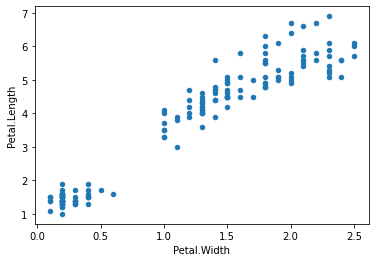

In [197]:
iris_df.plot(x="Petal.Width",y="Petal.Length",kind="scatter") # 상관계수가 높은 수의 산점도

<AxesSubplot:xlabel='Sepal.Width', ylabel='Sepal.Length'>

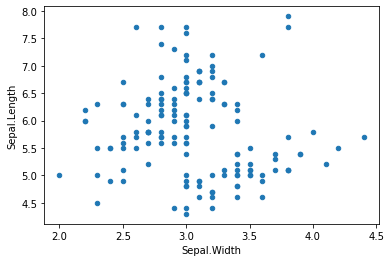

In [198]:
iris_df.plot(x="Sepal.Width",y="Sepal.Length",kind="scatter") # 상관계수가 낮은 수의 산점도